# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [81]:
!pip install folium

In [82]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # your favorite data package
import seaborn as sns  # your favorite visualization package
import sklearn as sk

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [84]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = pd.read_csv('/content/train.csv')
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [85]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = train.drop('dropoff_datetime', axis=1)
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

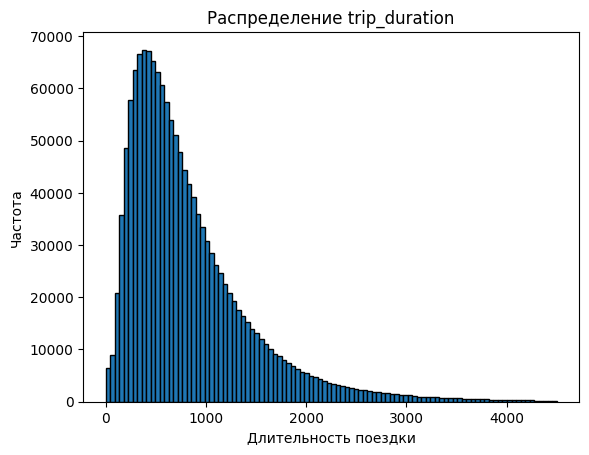

In [86]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = train['trip_duration']
plt.hist(data, bins=100, range=(0, 4500), edgecolor='black')
plt.title('Распределение trip_duration')
plt.xlabel('Длительность поездки')
plt.ylabel('Частота')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Основное время поездок сконцентрировано в районе 0-1000, что говорит о том, что в основном люди ездят на короткие расстояния. Также можно заметить, что гистограмма скошена вправо, что говорит о том, что в данных есть выбросы, которые увеличивают среднее значение длительности поездки, они идут аж до 4000, но их очень мало, поэтому они не влияют на общую картину(наверное??).

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE более устойчив к выбросам, он зануляет влияние больших ошибок + "единицы измерения" их тут нет (про то что рассказывали на лекции про rmse и mse) + пишут в инете, что он более устойчив к недообучению, нежели к переобучению (думаю это понадобиться тут) + rmsle юзают когда надо нам надо учитывать широкой диапазон значений (в нашем случае он такой) + лучше учитывается относительная ошибка

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:

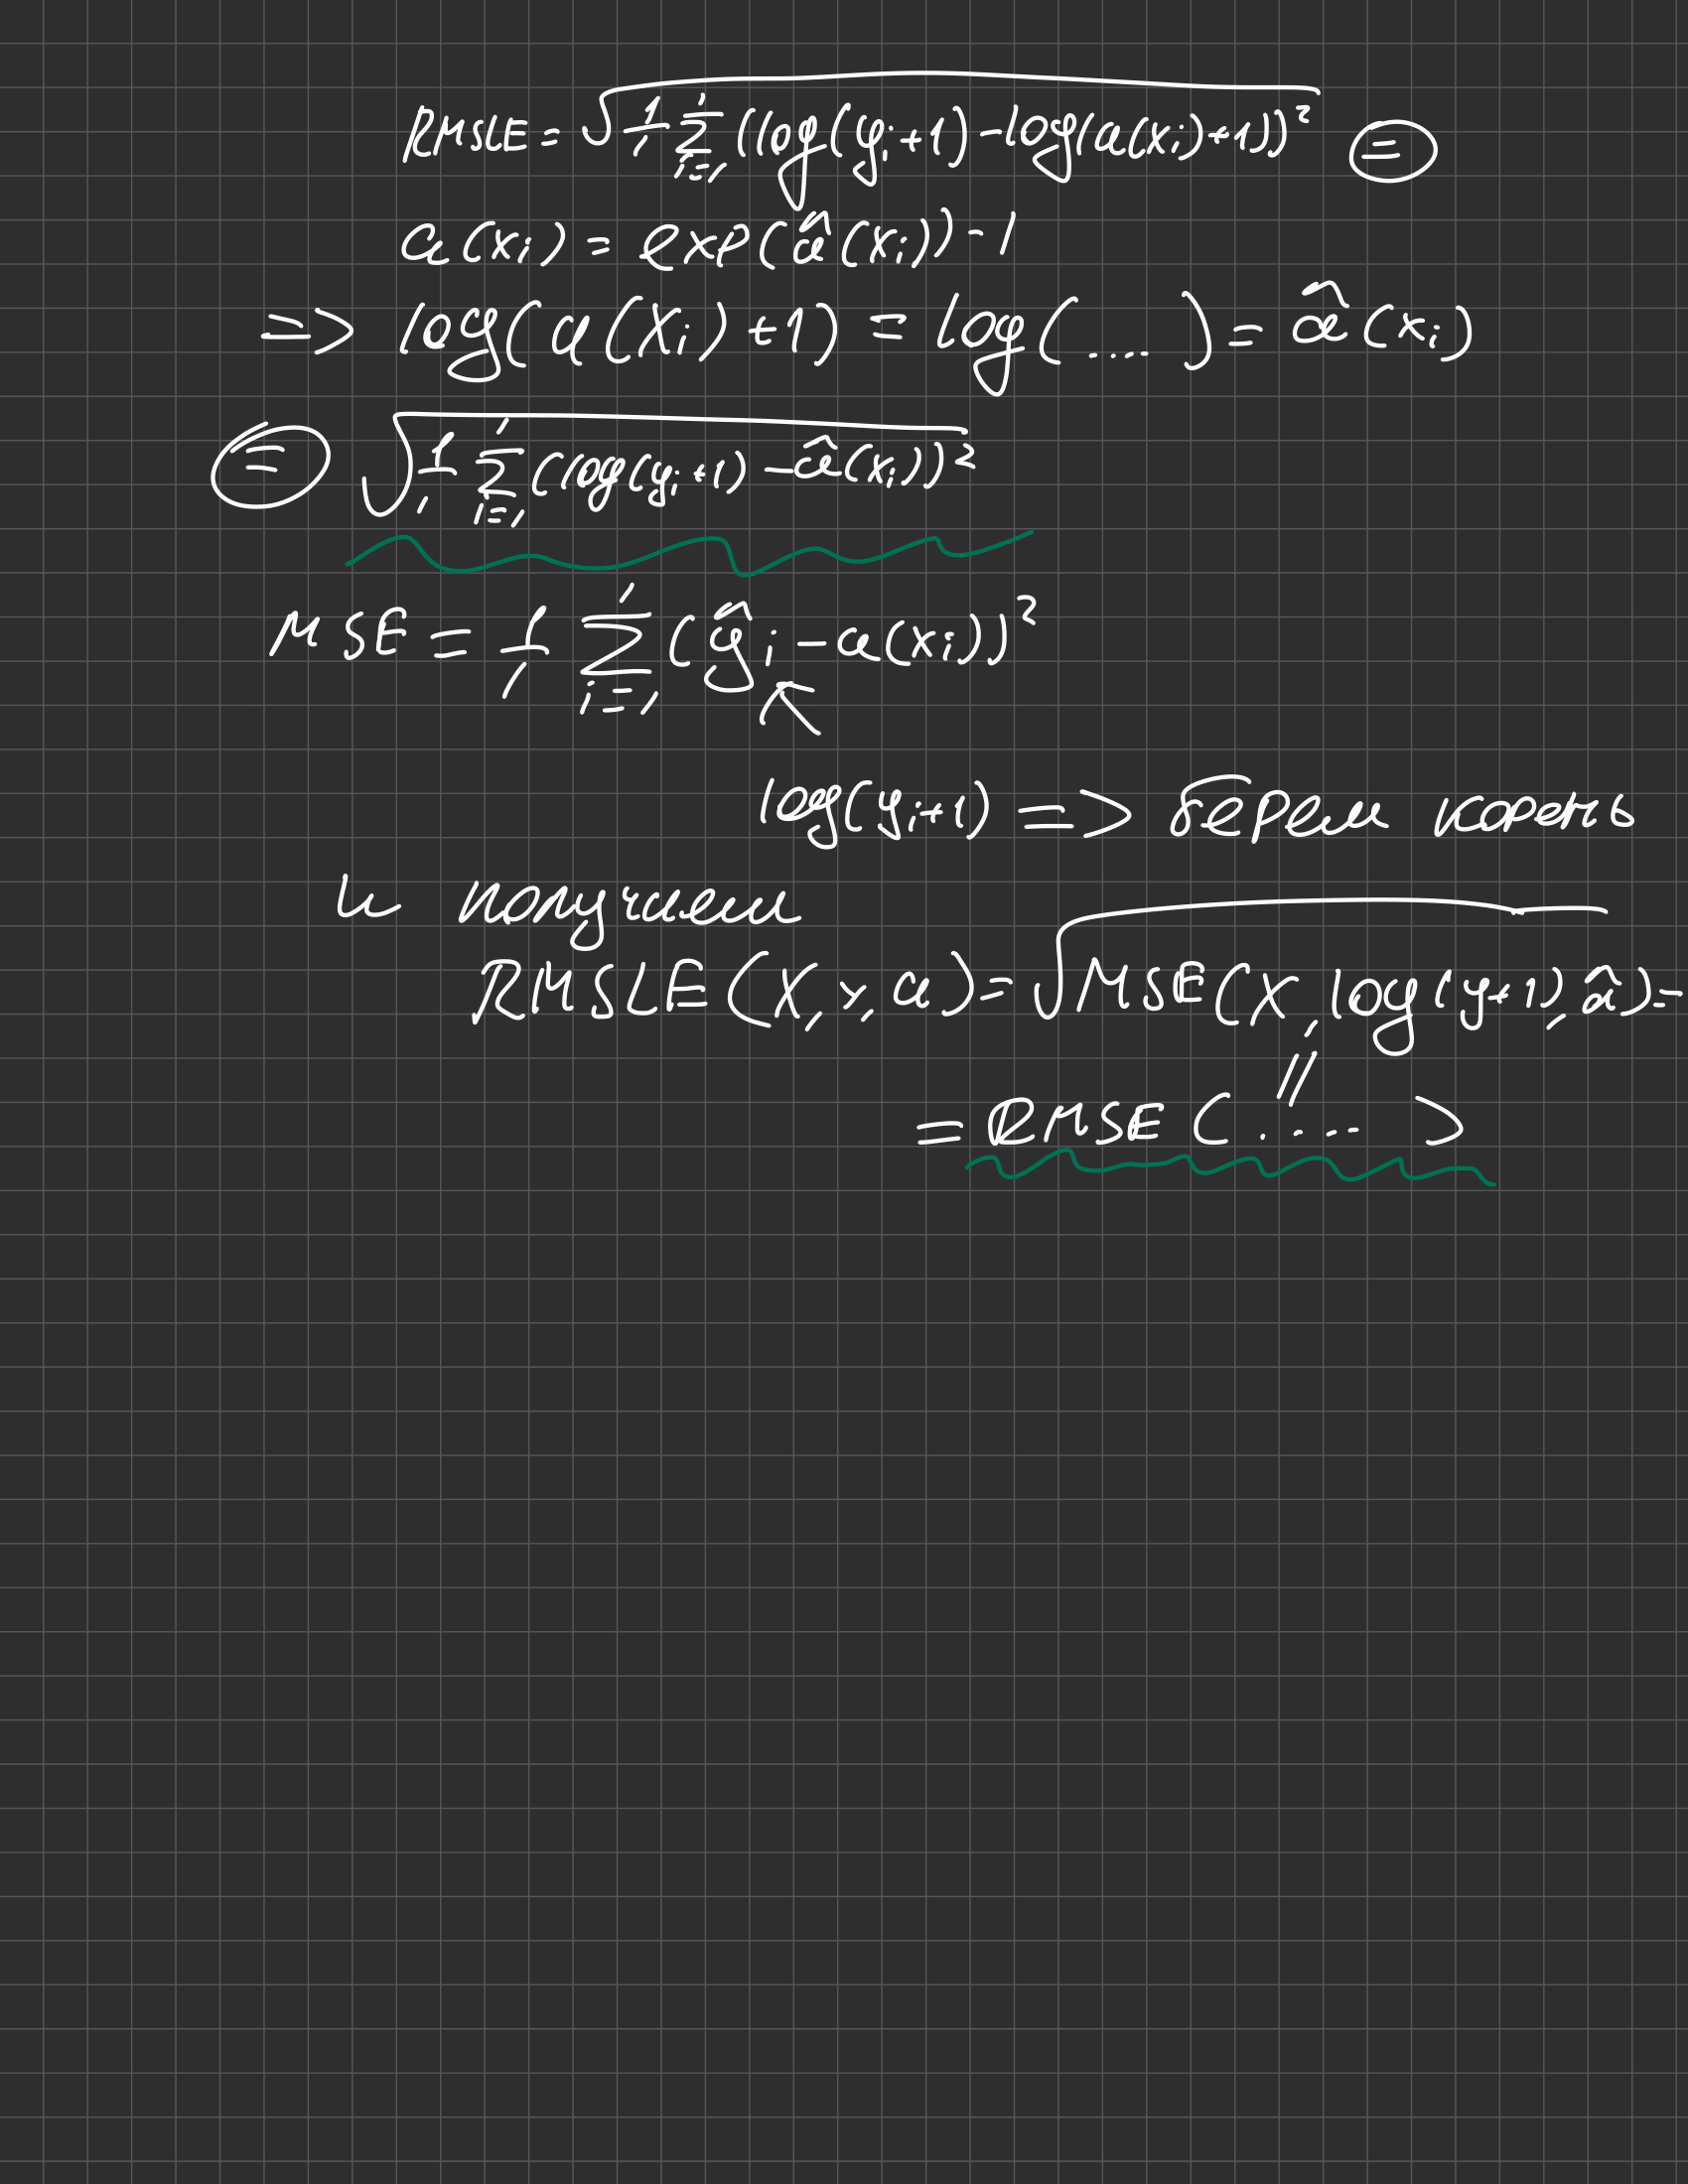

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

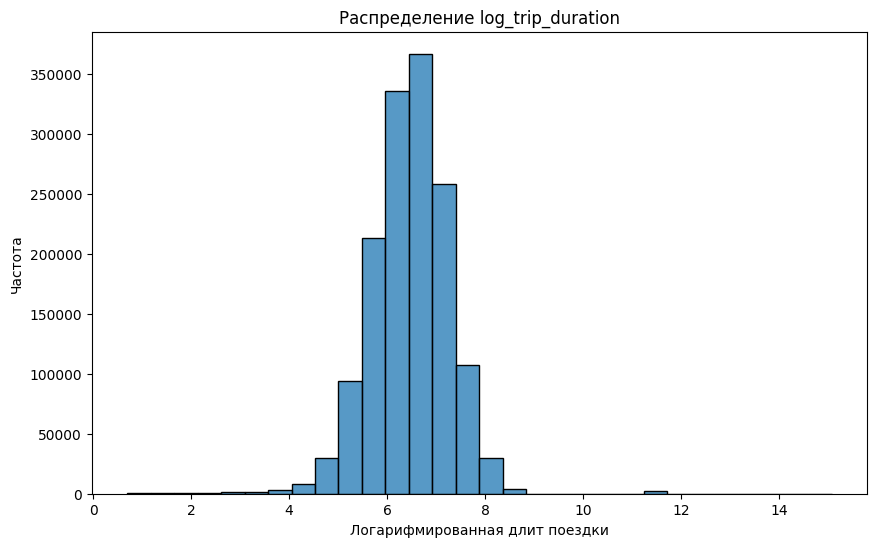

In [87]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['log_trip_duration'] = np.log1p(train['trip_duration'])
train = train.drop('trip_duration', axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(train['log_trip_duration'], bins=30, kde=False)
plt.title('Распределение log_trip_duration')
plt.xlabel('Логарифмированная длит поездки')
plt.ylabel('Частота')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [88]:
def rmsle(log1p_y_true, log1p_y_pred):
    squared_error = (log1p_y_true - log1p_y_pred) ** 2
    mean_squared_error = np.mean(squared_error)
    return np.sqrt(mean_squared_error)

log1p_y_true = train['log_trip_duration']
rmsle_best_const = rmsle(log1p_y_true, np.full_like(log1p_y_true, log1p_y_true.mean()))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, atol=1e-4)


0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

Как то меня смущает везде писать train, переименую его в df

In [89]:
df = train
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


In [90]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
daily_trip_counts = df.groupby('day_of_year').size().reset_index(name='trip_count')
daily_trip_counts

,day_of_year,trip_count
0,1,7162
1,2,6512
2,3,6353
3,4,6725
4,5,7204
...,...,...
177,178,7084
178,179,7311
179,180,7253
180,181,7623


Тут я просто вывел таблицу, а ща сделаю по ней график.

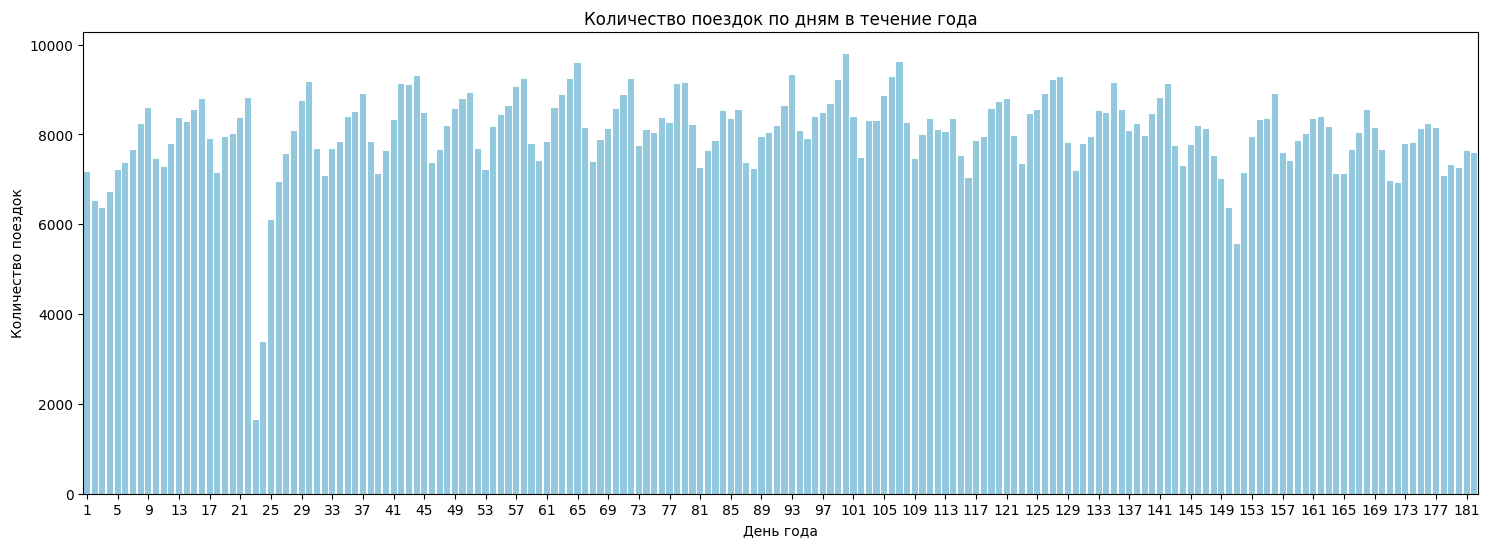

In [91]:
plt.figure(figsize=(18, 6))
sns.barplot(x='day_of_year', y='trip_count', data=daily_trip_counts, color="skyblue")
plt.xlabel('День года')
plt.ylabel('Количество поездок')
plt.xticks(plt.xticks()[0][::4])
plt.title('Количество поездок по дням в течение года')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.
**Ответ**: Можно заметить, что первый спад приходится на 21-15 день года (т.е. январь), а второй спад на 149-157(где то конец мая\). С графика точно дату узнать нельзя(если я поставлю икстиктс единицу, то будет мессиво чисел), поэтому я ща просто найду мин из той таблице выше и загуглю.

In [92]:
min_two_counts = daily_trip_counts.nsmallest(10,'trip_count')
min_two_counts

,day_of_year,trip_count
22,23,1648
23,24,3383
150,151,5570
24,25,6084
2,3,6353
149,150,6372
1,2,6512
3,4,6725
171,172,6910
25,26,6941


23 и 24  день = 1648 и 3383 поездок, был адовый снегопад
150 день = 5570, там были в конце мая длинные праздники

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:


<ipython-input-93-6a5781ab5fe6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='trip_count', data=trips_per_day, palette="Purples")


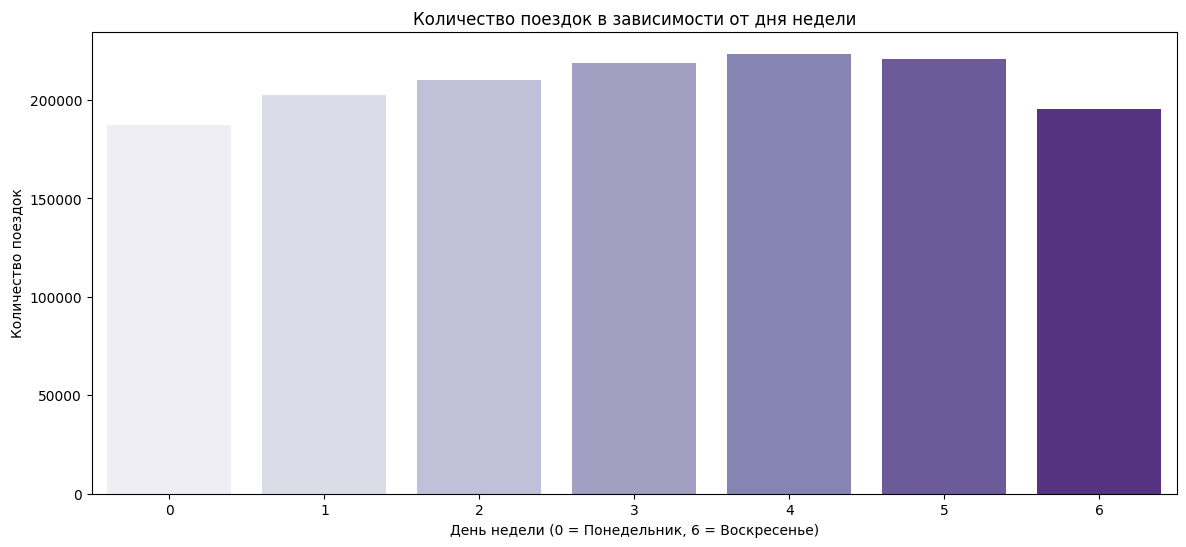

<ipython-input-93-6a5781ab5fe6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='trip_count', data=trips_per_hour, palette="Purples")


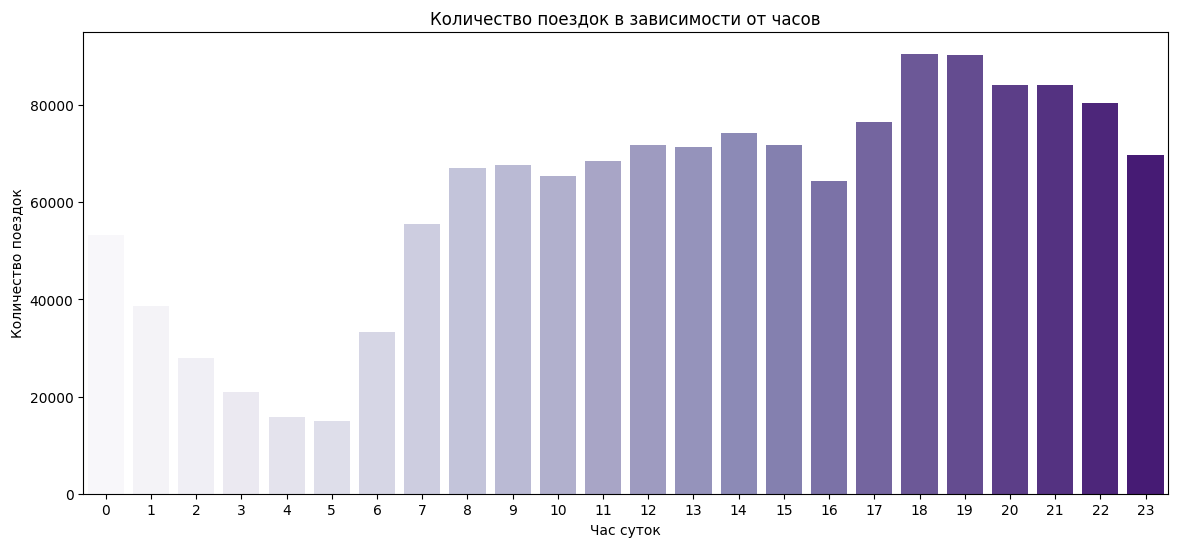

In [93]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # 0 - понедельник, 6 - воскресенье
df['hour'] = df['pickup_datetime'].dt.hour
# груп для подсчета количества поездок по дню недели
trips_per_day = train.groupby('day_of_week').size().reset_index(name='trip_count')
# груп для подсчета количества поездок по часу
trips_per_hour = train.groupby('hour').size().reset_index(name='trip_count')

plt.figure(figsize=(14, 6))
sns.barplot(x='day_of_week', y='trip_count', data=trips_per_day, palette="Purples")
plt.title('Количество поездок в зависимости от дня недели')
plt.xlabel('День недели (0 = Понедельник, 6 = Воскресенье)')
plt.ylabel('Количество поездок')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='hour', y='trip_count', data=trips_per_hour, palette="Purples")
plt.title('Количество поездок в зависимости от часов')
plt.xlabel('Час суток')
plt.ylabel('Количество поездок')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

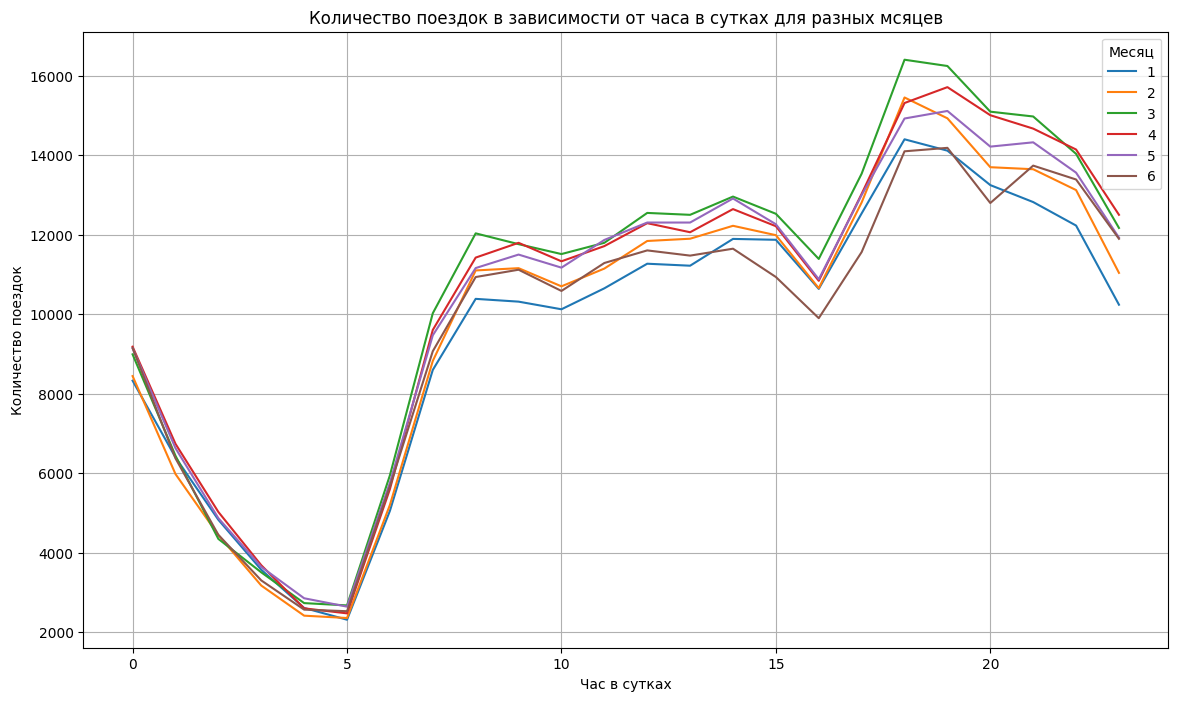

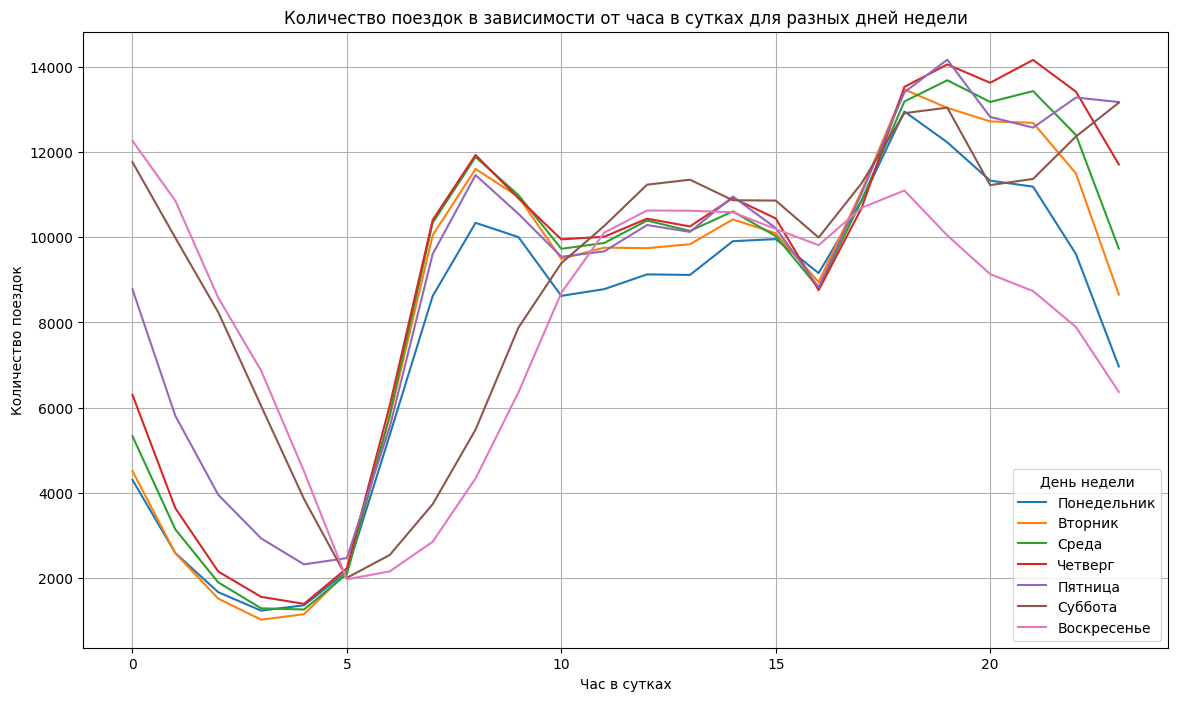

In [94]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['month'] = df['pickup_datetime'].dt.month

trips_per_hour_month = df.groupby(['month', 'hour']).size().reset_index(name='trip_count')
plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='trip_count', hue='month', data=trips_per_hour_month, palette='tab10')
plt.title('Количество поездок в зависимости от часа в сутках для разных мсяцев')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.legend(title='Месяц')
plt.grid()
plt.show()

# У меня не выходило почему-то нарисвовать график, так чтобы цвета были четко разные и лейблам все соотвестовавало, поэтому я тут написал какую то кастомную дичь
trips_per_hour_day = df.groupby(['day_of_week', 'hour']).size().reset_index(name='trip_count')
plt.figure(figsize=(14, 8))
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
day_labels = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
sns.lineplot(x='hour', y='trip_count', hue='day_of_week', data=trips_per_hour_day, palette=custom_colors)
plt.title('Количество поездок в зависимости от часа в сутках для разных дней недели')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=day_labels, title='День недели')
plt.grid()
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: По первому графику видно, что ничего не выделяется. Кривые каждого месяца идут очень близко друг к другу в одном направлении, иногда какая-то кривая 'опережает' другую(большее количество поездок в какой-то чат), но это скорее случайности, чем какая то реальная причина такому поведению. А по второму графику выделяется, что в 12 часов ночи начинается спад вызова такси независимо от дня недели, дстигая минимума где то в промежутке от 3 до 5 утра. С утра все вызывают такси (работяги), а вот после 8 единсвтенные кто идут в рост это ребята, которые вызывают такси по субботам.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

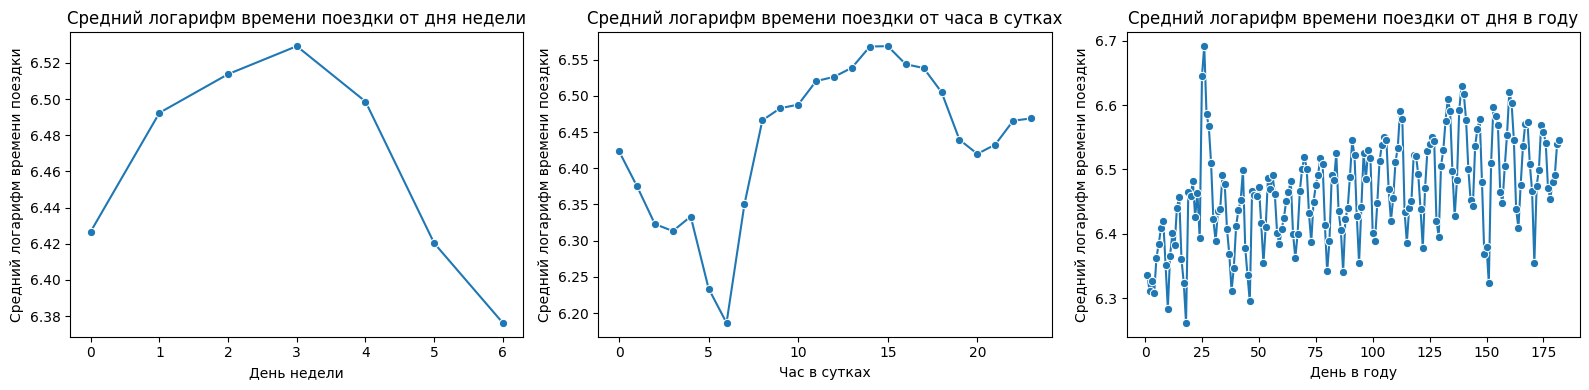

In [95]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
avg_log_duration_day_of_week = train_df.groupby('day_of_week')['log_trip_duration'].mean().reset_index()
avg_log_duration_hour = train_df.groupby('hour')['log_trip_duration'].mean().reset_index()
avg_log_duration_day_of_year = train_df.groupby('day_of_year')['log_trip_duration'].mean().reset_index()

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.lineplot(x='day_of_week', y='log_trip_duration', data=avg_log_duration_day_of_week, marker='o')
plt.title('Средний логарифм времени поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм времени поездки')

plt.subplot(1, 3, 2)
sns.lineplot(x='hour', y='log_trip_duration', data=avg_log_duration_hour, marker='o')
plt.title('Средний логарифм времени поездки от часа в сутках')
plt.xlabel('Час в сутках')
plt.ylabel('Средний логарифм времени поездки')

plt.subplot(1, 3, 3)
sns.lineplot(x='day_of_year', y='log_trip_duration', data=avg_log_duration_day_of_year, marker='o')
plt.title('Средний логарифм времени поездки от дня в году')
plt.xlabel('День в году')
plt.ylabel('Средний логарифм времени поездки')

plt.tight_layout()
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Похожи по тренду значений, ну потому что мы просто логарифмом сгладили диапазон, тенденция осталась такая же. По поводу тренда, то можно заметить, что с каждым днем в году поездок становилось больше, мб связано с тем что зимой такси дороже, а к весне дешевле и люди больше им пользуются (типо дешевле так как дороги чище и прочее всякое).

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели - уже есть
2. Месяц - уже есть
3. Час - уже есть
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году - уже есть

In [96]:
df['month'] = df['pickup_datetime'].dt.month_name()
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

df['month'] = df['month'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')

df[['month', 'day_of_week']].head()

,month,day_of_week
0,March,Monday
1,June,Sunday
2,January,Tuesday
3,April,Wednesday
4,March,Saturday


In [97]:
df['anomalous_period_1'] = df['pickup_datetime'].dt.dayofyear.isin([23, 24]).astype(int)  # Период 1: дни 23 и 24
df['anomalous_period_2'] = (df['pickup_datetime'].dt.dayofyear == 151).astype(int)         # Период 2: день 151

df[['pickup_datetime', 'anomalous_period_1', 'anomalous_period_2']].head()
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_year,day_of_week,hour,month,anomalous_period_1,anomalous_period_2
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,74,Monday,17,March,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,164,Sunday,0,June,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,19,Tuesday,11,January,0,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,97,Wednesday,19,April,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,86,Saturday,13,March,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,99,Friday,13,April,0,0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,10,Sunday,7,January,0,0
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,113,Friday,6,April,0,0
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,5,Tuesday,15,January,0,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?
**Ответ**: Категориальные: месяц, день недели, аномальный период. Численные: час, номер дня в году. Потому что месяц, день недели и аномальный период не имеют порядка, а час и номер дня в году имеют порядок. Плюс не создавать лишний раз зависимости между признаками.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [98]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = df[['day_of_week', 'month', 'hour', 'day_of_year', 'anomalous_period_1', 'anomalous_period_2']]
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
categorical_features = ['day_of_week', 'month', 'hour', 'anomalous_period_1', 'anomalous_period_2']
numerical_features = ['day_of_year']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
rmsle = np.sqrt(np.mean((model.predict(X_test) - y_test) ** 2))
print(f'R^2 на тестовой выборке: {test_score}') # Его тут не просят я прост вывожу
print(f'RMSLE: {rmsle}')

R^2 на тестовой выборке: 0.017155849065704
RMSLE: 0.7881777174124217


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [99]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a datafr
    ame
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [100]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sample_df = df.sample(1000, random_state=42)
your_lat_values = sample_df['pickup_latitude']
your_lon_values = sample_df['pickup_longitude']
show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

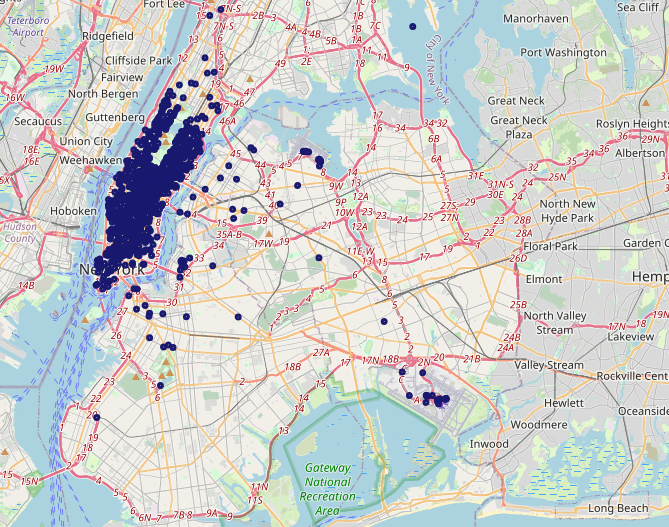

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: На карте выделяются скопления точек в центре манхэттена и возле аэропортов лагуардия и кеннеди. Это важно так как это два типа поездок - коротки по главной улице города и длинные от аэропорта куда то или в сам в аэропорт.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [101]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ оказывается на семе была готовая функция, я и забыл, но она там ваще не сильно вроде отличается, а значения такие же3
def haversine(lat1, lon1, lat2, lon2):
    # Константы
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['haversine'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                            df['dropoff_latitude'], df['dropoff_longitude'])

df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'haversine']].head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,haversine
0,40.767937,-73.982155,40.765602,-73.964630,1.498521
1,40.738564,-73.980415,40.731152,-73.999481,1.805507
2,40.763939,-73.979027,40.710087,-74.005333,6.385098
3,40.719971,-74.010040,40.706718,-74.012268,1.485498
4,40.793209,-73.973053,40.782520,-73.972923,1.188588


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [102]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_haversine'] = np.log1p(df['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [103]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df[['haversine', 'log_haversine', 'log_trip_duration']].corr()

,haversine,log_haversine,log_trip_duration
haversine,1.000000,0.844501,0.573595
log_haversine,0.844501,1.000000,0.749882
log_trip_duration,0.573595,0.749882,1.000000


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [104]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['average_speed'] = df['haversine'] / np.exp(df['log_trip_duration'])
df['average_speed'] = df['average_speed'] * 3600  # перевод в скорость адекватную
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_year,day_of_week,hour,month,anomalous_period_1,anomalous_period_2,haversine,log_haversine,average_speed
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,74,Monday,17,March,0,0,1.498521,0.915699,11.830427
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,164,Sunday,0,June,0,0,1.805507,1.031584,9.788894
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,19,Tuesday,11,January,0,0,6.385098,1.999464,10.817108
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,97,Wednesday,19,April,0,0,1.485498,0.910473,12.436731
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,86,Saturday,13,March,0,0,1.188588,0.783257,9.814033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,99,Friday,13,April,0,0,1.225080,0.799793,5.661474
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,10,Sunday,7,January,0,0,6.049836,1.953004,33.200317
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,113,Friday,6,April,0,0,7.824606,2.177544,36.821674
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,5,Tuesday,15,January,0,0,1.092564,0.738390,10.516658


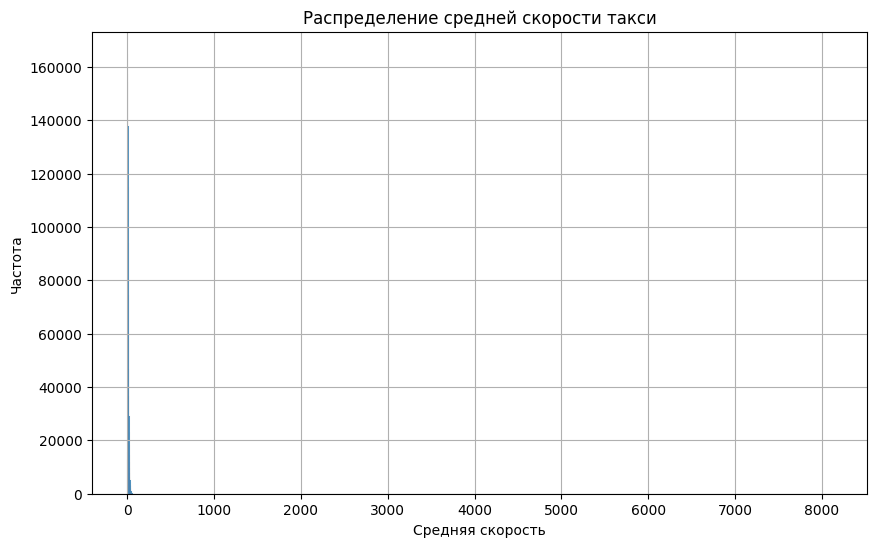

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_speed'], bins=5000)
plt.title('Распределение средней скорости такси')
plt.xlabel('Средняя скорость')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

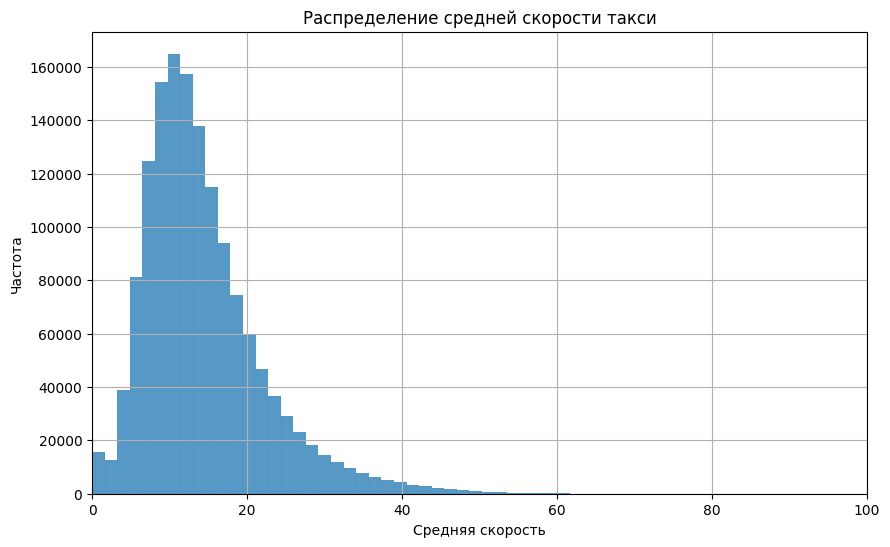

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_speed'], bins=5000)
plt.xlim(0, 100)
plt.title('Распределение средней скорости такси')
plt.xlabel('Средняя скорость')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<ipython-input-107-5ad34fa15aff>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_speeds = df.groupby(['day_of_week', 'hour'])['average_speed'].median().unstack()


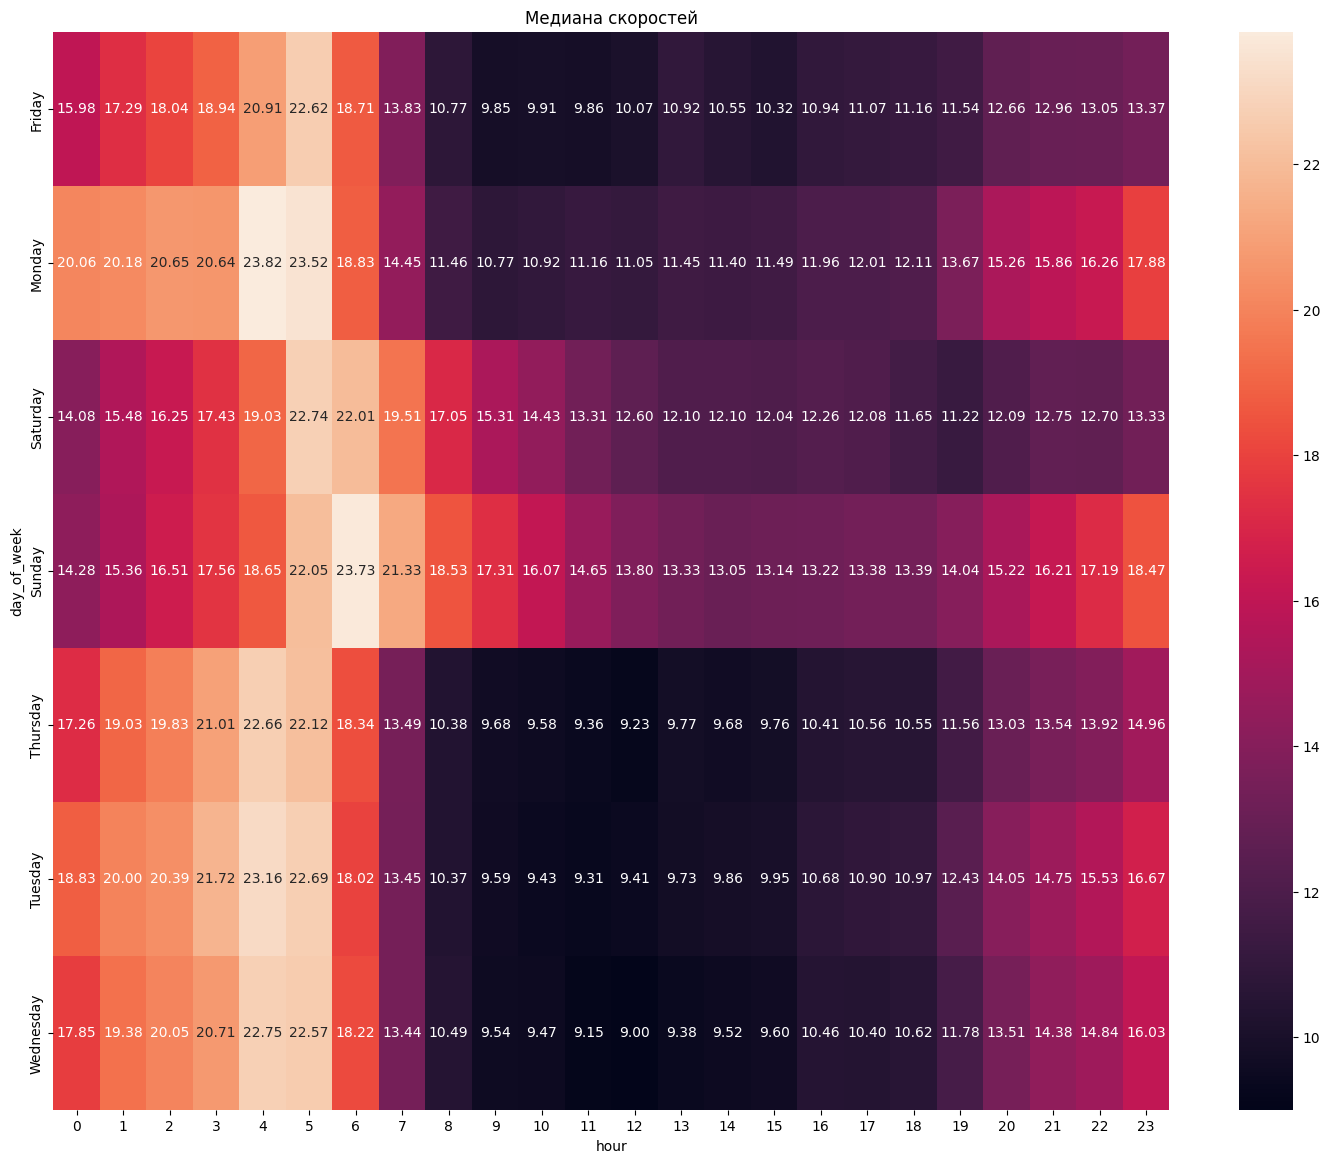

In [107]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
median_speeds = df.groupby(['day_of_week', 'hour'])['average_speed'].median().unstack()

plt.figure(figsize=(18, 14))
sns.heatmap(median_speeds, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Медиана скоростей')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?
**Ответ**: Потому что значение очень сильно коррелирует с таргетом, что приведет к переобучению модели.

In [108]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df.drop(['average_speed'],axis=1,inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.
**Ответ**: Минимальна скорость где с утра до 12-13 по будням,  а максимальна во все дни по утрам до 7 утра и в воскресенье вечером.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [109]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['rush_hour'] = ((df['pickup_datetime'].dt.dayofweek < 5) &  # Понедельник - Пятница
                   ((df['pickup_datetime'].dt.hour >= 7) & (df['pickup_datetime'].dt.hour <= 10) |  # Утро
                    (df['pickup_datetime'].dt.hour >= 16) & (df['pickup_datetime'].dt.hour <= 19)))  # Вечер

df['free_flow'] = ((df['pickup_datetime'].dt.hour <= 5) |  # Ночь
                   ((df['pickup_datetime'].dt.dayofweek >= 5) &  # Суббота - Воскресенье
                    (df['pickup_datetime'].dt.hour >= 10) & (df['pickup_datetime'].dt.hour <= 16)))  # День
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_year,day_of_week,hour,month,anomalous_period_1,anomalous_period_2,haversine,log_haversine,rush_hour,free_flow
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,74,Monday,17,March,0,0,1.498521,0.915699,True,False
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,164,Sunday,0,June,0,0,1.805507,1.031584,False,True
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,19,Tuesday,11,January,0,0,6.385098,1.999464,False,False
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,97,Wednesday,19,April,0,0,1.485498,0.910473,True,False
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,86,Saturday,13,March,0,0,1.188588,0.783257,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,99,Friday,13,April,0,0,1.225080,0.799793,False,False
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,10,Sunday,7,January,0,0,6.049836,1.953004,False,False
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,113,Friday,6,April,0,0,7.824606,2.177544,False,False
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,5,Tuesday,15,January,0,0,1.092564,0.738390,False,False


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?
**Ответ**: Потому что это самые важные места в городе с точки зрения спроса, поэтому их надо запомнить.


Функия создает признаки и вычисляет находится ли в одном из трех мест стартовая или конечная точка поездки. Тут идея, что я беру координаты из гугла и чекаю, что они в диапазоне +- 1км (чатик рассчитал как градусы в км перевести) и передает либо 0 либо 1 в этот признак.

In [110]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def in_radius(df, center_lat, center_lon):
    km_radius=1
    lat_range = km_radius / 110.574  # Я ваще не понимал как мне сделать +- 1км в координатах. Тут мне чат помог как это рассчитать.
    lon_range = km_radius / (111.320 * np.cos(np.radians(center_lat)))  # Анологично

    lat_in_range = (df['pickup_latitude'].between(center_lat - lat_range, center_lat + lat_range))
    lon_in_range = (df['pickup_longitude'].between(center_lon - lon_range, center_lon + lon_range))
    pickup_in_range = lat_in_range & lon_in_range

    lat_in_range = (df['dropoff_latitude'].between(center_lat - lat_range, center_lat + lat_range))
    lon_in_range = (df['dropoff_longitude'].between(center_lon - lon_range, center_lon + lon_range))
    dropoff_in_range = lat_in_range & lon_in_range

    return pickup_in_range.astype(int), dropoff_in_range.astype(int)

df['pickup_manhattan'], df['dropoff_manhattan'] = in_radius(df, 40.776676, -73.971321)
df['pickup_laguardia'], df['dropoff_laguardia'] = in_radius(df, 40.776863, -73.874069)
df['pickup_jfk'], df['dropoff_jfk'] = in_radius(df, 40.641766, -73.780968)

df[['pickup_manhattan', 'dropoff_manhattan', 'pickup_laguardia', 'dropoff_laguardia', 'pickup_jfk', 'dropoff_jfk']].head()

,pickup_manhattan,dropoff_manhattan,pickup_laguardia,dropoff_laguardia,pickup_jfk,dropoff_jfk
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

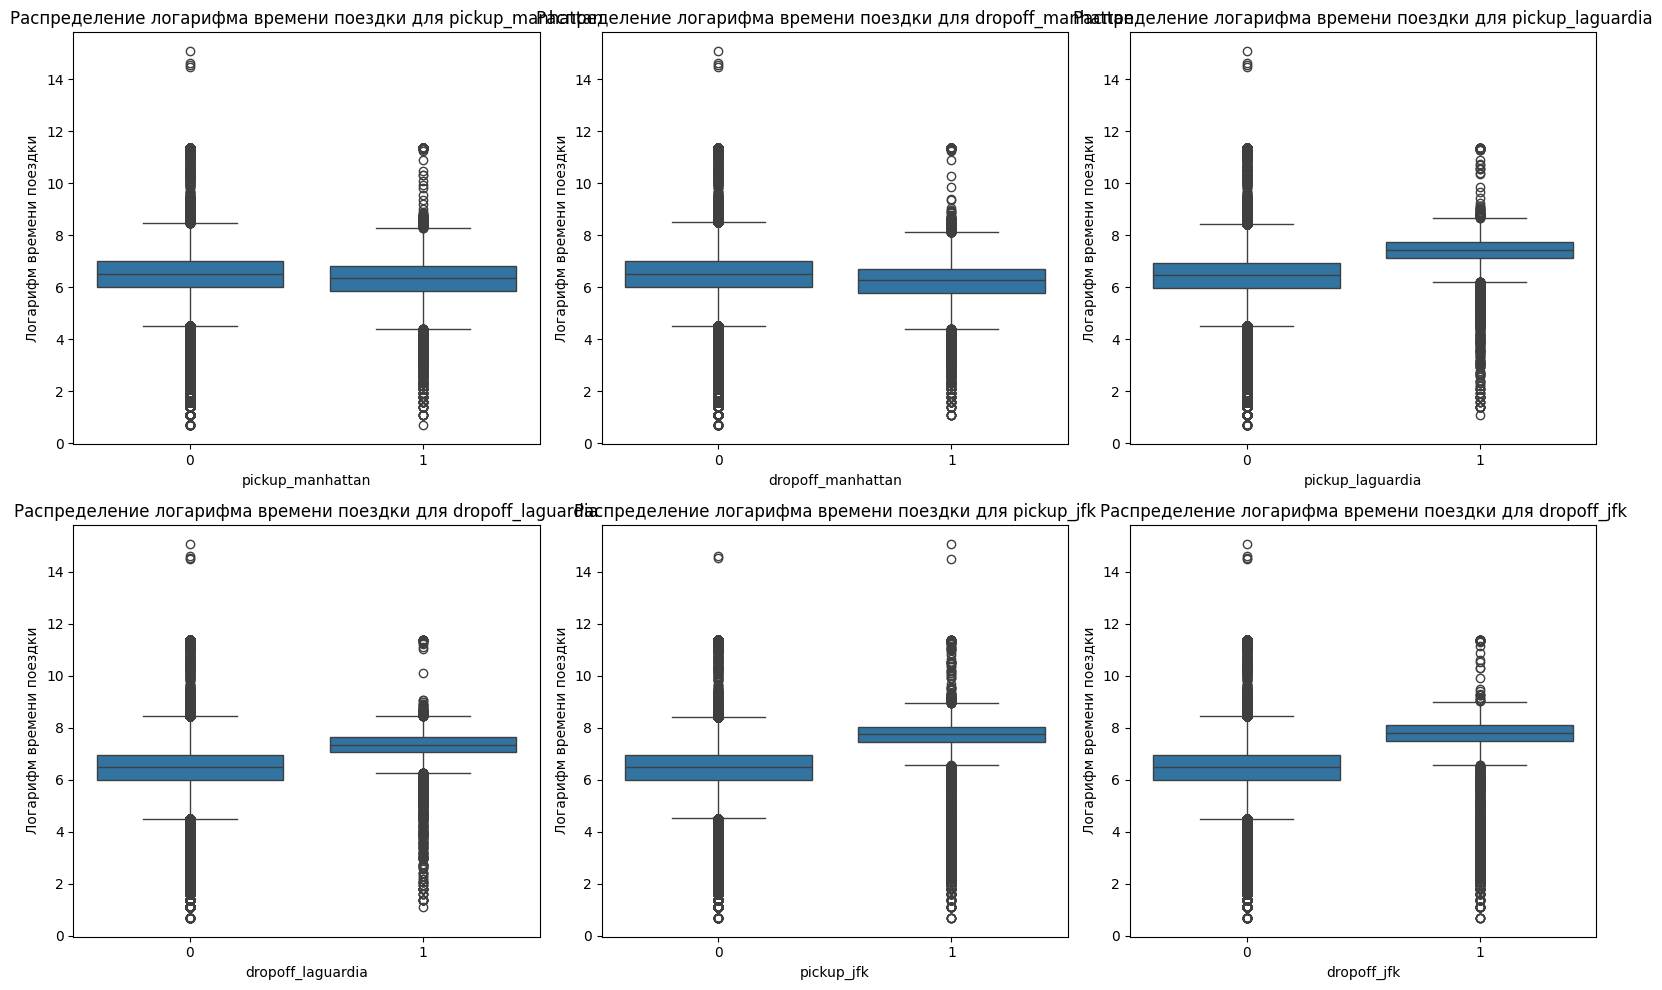

In [111]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
location_features = [
    'pickup_manhattan', 'dropoff_manhattan',
    'pickup_laguardia', 'dropoff_laguardia',
    'pickup_jfk', 'dropoff_jfk'
]
plt.figure(figsize=(16, 10))
for i, feature in enumerate(location_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y=df['log_trip_duration'], data=df)
    plt.title(f'Распределение логарифма времени поездки для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Логарифм времени поездки')

plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?
**Ответ**: Не думаю, надо больше информации. Тут можно заметить какую то схожесть пикапа и дропп офа в однои месте (ну время одно тратится), но в целом тут мало инфорации, чтобы сделать вывод хороший вышел признак или нет (ну я думаю, что сам признак вышел нормально, просто график его не очень ясно/прямолинейно объясняет)

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

*У меня буквально слетела домашка с этого момента за 12 минут до дл, поэтому я все переписывал. В этом классе я попросил чат написать каменты, тк я был близок к подрыву самого себя  и мне было морально плохо заново писать комменты, учитывая что мне еще и весь код пришлось переписывать с 9го номера))*


In [112]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=4, n_cols=3, lat_min=40.70, lat_max=40.82, lon_min=-74.01, lon_max=-73.94): ## я позаимствовал координаты у чат гпт
        self.n_rows = n_rows  # количество строк сетки
        self.n_cols = n_cols  # количество столбцов сетки
        self.lat_min = lat_min  # минимальная широта
        self.lat_max = lat_max  # максимальная широта
        self.lon_min = lon_min  # минимальная долгота
        self.lon_max = lon_max  # максимальная долгота

    def show_map(self): # фуункцию взял у другого, подредачил, чтобы работала у меня и можно было проверить, что все ок
        map_center = [(self.lat_min + self.lat_max) / 2, (self.lon_min + self.lon_max) / 2]
        m = folium.Map(location=map_center, zoom_start=12)

        folium.Rectangle(
            bounds=[[self.lat_min, self.lon_min], [self.lat_max, self.lon_max]],
            color='red',
            fill=False
        ).add_to(m)

        lon_lines = np.linspace(self.lon_min, self.lon_max, self.n_cols + 1)
        for lon in lon_lines:
            folium.PolyLine(
                locations=[[self.lat_min, lon], [self.lat_max, lon]],
                color='red',
                weight=1
            ).add_to(m)

        lat_lines = np.linspace(self.lat_min, self.lat_max, self.n_rows + 1)
        for lat in lat_lines:
            folium.PolyLine(
                locations=[[lat, self.lon_min], [lat, self.lon_max]],
                color='red',
                weight=1
            ).add_to(m)

        return m


    def fit(self, X=None, y=None):
        # Вычисляем размеры каждой ячейки по широте и долготе
        self.size_x = (self.lon_max - self.lon_min) / self.n_cols
        self.size_y = (self.lat_max - self.lat_min) / self.n_rows
        return self

    def transform(self, X, y=None):
        # Вычисляем координаты ячеек для начала поездки
        start_col = ((X['pickup_longitude'] - self.lon_min) // self.size_x).astype(int)
        start_row = ((X['pickup_latitude'] - self.lat_min) // self.size_y).astype(int)

        # Вычисляем координаты ячеек для конца поездки
        end_col = ((X['dropoff_longitude'] - self.lon_min) // self.size_x).astype(int)
        end_row = ((X['dropoff_latitude'] - self.lat_min) // self.size_y).astype(int)

        # Вычисляем номер ячейки для начала и конца поездки
        ride_pos_start = start_row * self.n_cols + start_col
        ride_pos_end = end_row * self.n_cols + end_col

        # Присваиваем -1, если координаты выходят за пределы сетки
        ride_pos_start[(start_col < 0) | (start_col >= self.n_cols) |
                       (start_row < 0) | (start_row >= self.n_rows)] = -1
        ride_pos_end[(end_col < 0) | (end_col >= self.n_cols) |
                     (end_row < 0) | (end_row >= self.n_rows)] = -1

        result = X.copy()
        result['ride_pos_start'] = ride_pos_start
        result['ride_pos_end'] = ride_pos_end
        return result




In [113]:
transformer = MapGridTransformer()
transformer.fit(df)
df = transformer.transform(df)
transformer.show_map()

Вот фото карты 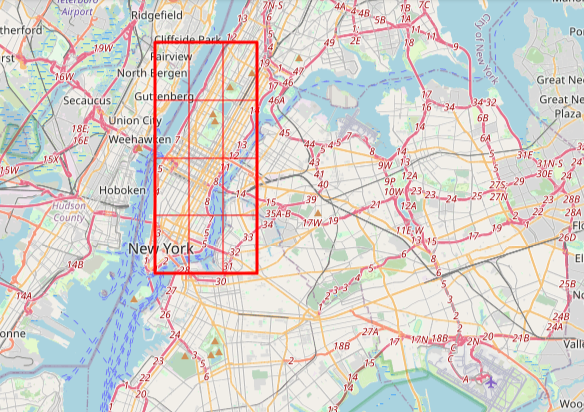

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [114]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features_2 = [
    'day_of_week', 'hour', 'month',
    'anomalous_period_1', 'anomalous_period_2',
    'rush_hour', 'free_flow',
    'pickup_manhattan' ,	'dropoff_manhattan','pickup_laguardia',
    'dropoff_laguardia' ,	'pickup_jfk' 	,'dropoff_jfk',
    'ride_pos_start', 'ride_pos_end'
]
numerical_features_2 = ['log_haversine', 'day_of_year']

X2 = df[categorical_features_2 + numerical_features_2]
y2 = df['log_trip_duration']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

preprocessor2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_2),
        ('num', StandardScaler(), numerical_features_2)
    ])

model2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('regressor', Ridge())
])
model2.fit(X_train2, y_train2)
test_score2 = model2.score(X_test2, y_test2)
rmsle2 = np.sqrt(np.mean((model2.predict(X_test2) - y_test2) ** 2))
print(f'R^2 на тестовой выборке: {test_score2}') # Его тут не просят я прост вывожу
print(f'RMSLE: {rmsle2}')

R^2 на тестовой выборке: 0.6395365110482617
RMSLE: 0.47732311373636


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.
**Ответ**: Вендор показывает айдишку компании-такси, может быть полезно чтобы понять условно какой агрегатор чаще возит на короткие поездки, а какой на дальние. Кол-во пассажиров указывает на то сколько челов именно юзает такси (заказать то может 1 чел, но именно такси будет использовать вся компашка). Ласт тема показываетс сохранилась ли поездка в системе или нет, мб полезно, чтобы учитывать как часто таксисты ездят неофициально (как никак такой показатель тоже показывает спрос на такси).

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [115]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(df.vendor_id.unique())
print(df.passenger_count.unique())
print(df.store_and_fwd_flag.unique())

[2 1]
[1 6 4 2 3 5 0 7 9 8]
['N' 'Y']


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

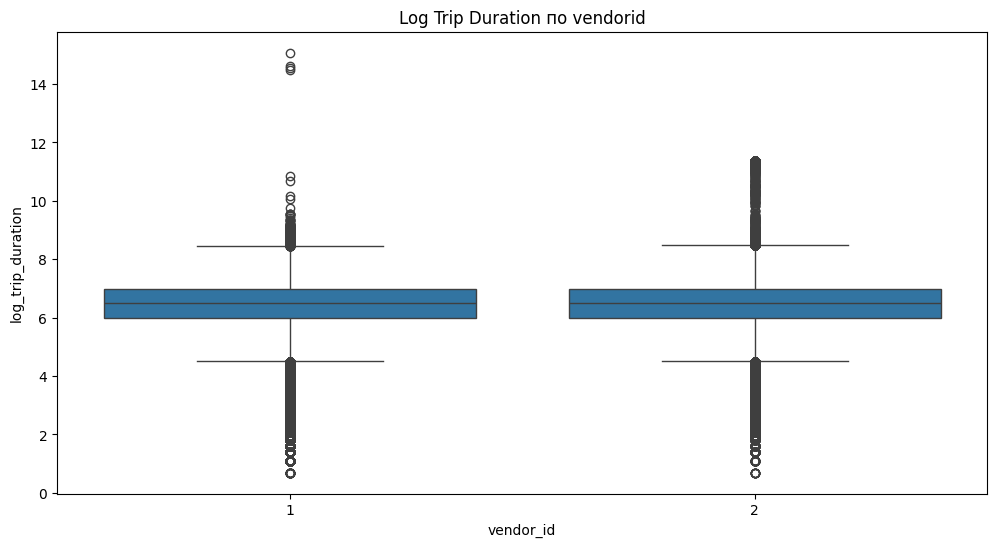

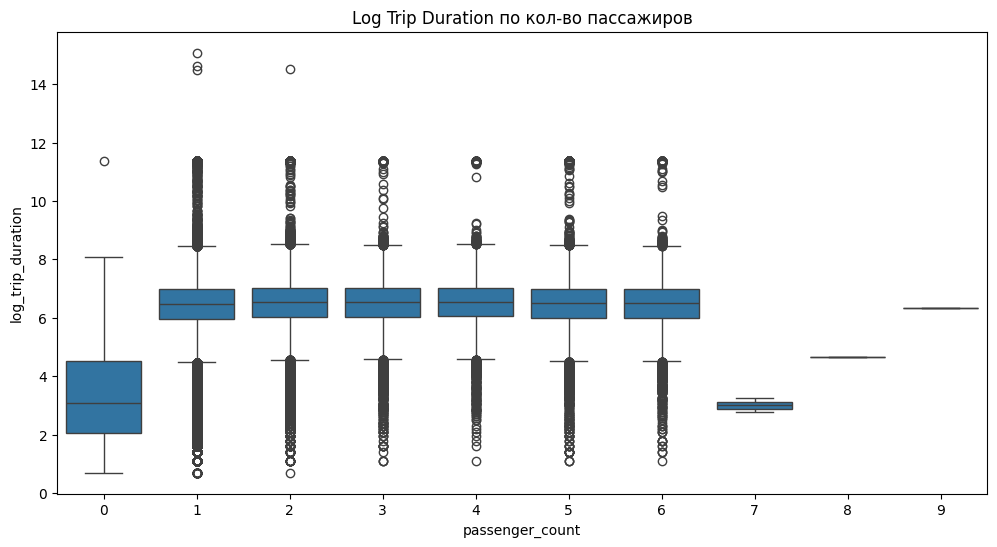

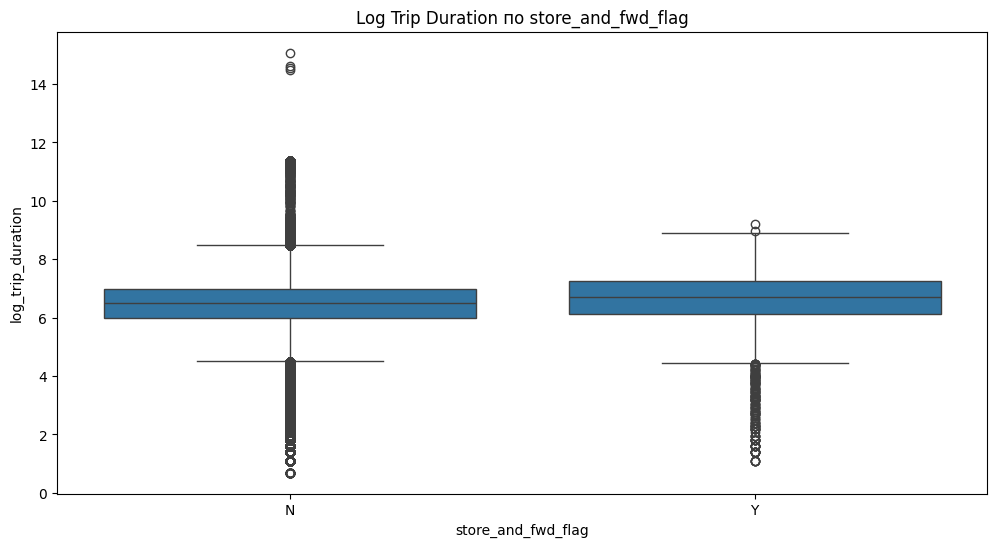

In [116]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='vendor_id', y='log_trip_duration')
plt.title('Log Trip Duration по vendorid')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='passenger_count', y='log_trip_duration')
plt.title('Log Trip Duration по кол-во пассажиров')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='store_and_fwd_flag', y='log_trip_duration')
plt.title('Log Trip Duration по store_and_fwd_flag')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [117]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['vendor_id'] = (df['vendor_id'] - 1).astype(int)

df['store_and_fwd_flag'] = (df['store_and_fwd_flag'] == 'Y').astype(int)

df[['vendor_id', 'store_and_fwd_flag']].head()

,vendor_id,store_and_fwd_flag
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?
**Ответ**: Я не думаю, на глаз они довольно авг знач принимают, чтобы как то задуматься о том, что они могут повлиять. Инфы на графиках мало для того чтобы сказать точно, но я думаю нет. p.s. как оказалось они реально буквальньо бесполезны


**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [118]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features_3= [
    'day_of_week', 'hour', 'month',
    'anomalous_period_1', 'anomalous_period_2',
    'rush_hour', 'free_flow',
    'pickup_manhattan' ,	'dropoff_manhattan','pickup_laguardia',
    'dropoff_laguardia' ,	'pickup_jfk' 	,'dropoff_jfk',
    'vendor_id', 'store_and_fwd_flag',
     'ride_pos_start', 'ride_pos_end'

]
numerical_features_3 = ['log_haversine', 'day_of_year']

X3 = df[categorical_features_3 + numerical_features_3]
y3 = df['log_trip_duration']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

preprocessor3 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_3),
        ('num', StandardScaler(), numerical_features_3)
    ])

model3 = Pipeline(steps=[
    ('preprocessor', preprocessor3),
    ('regressor', Ridge())
])
model3.fit(X_train3, y_train3)
test_score3 = model3.score(X_test3, y_test3)
rmsle3 = np.sqrt(np.mean((model3.predict(X_test3) - y_test3) ** 2))
print(f'R^2 на тестовой выборке: {test_score3}') # Его тут не просят я прост вывожу
print(f'RMSLE: {rmsle3}')

R^2 на тестовой выборке: 0.6397306861332896
RMSLE: 0.4771945338049275


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

**Ответ**: Изменения мне каж неплохие, как минимум я бы НЕ стал удалять.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

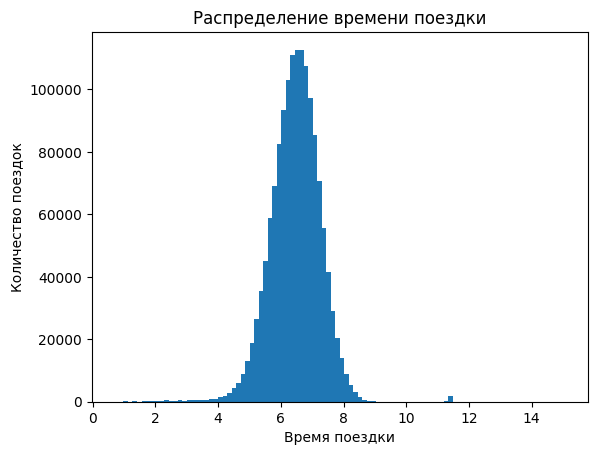

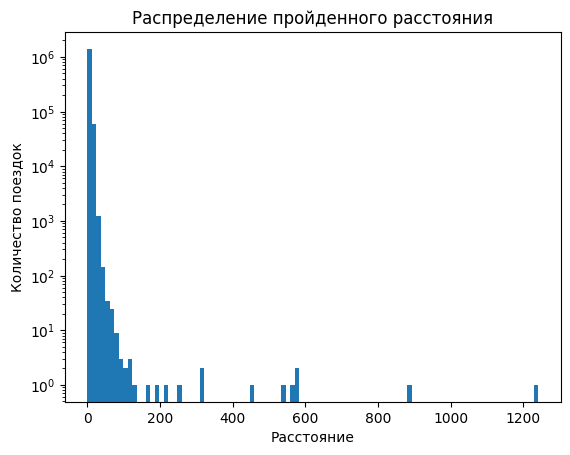

In [119]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(df['log_trip_duration'], bins=100)
plt.title('Распределение времени поездки')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.show()


plt.hist(df['haversine'], bins=100, log=True)
plt.title('Распределение пройденного расстояния')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [120]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df[(3 < df['log_trip_duration']) & (df['log_trip_duration'] < 9)]
df = df[df['haversine'] < 400]

Сейчас методом пристального взгляда посмотрим на кол-во признаков.

In [121]:
print(df['rush_hour'].value_counts())
print(df['free_flow'].value_counts())
print(df['anomalous_period_2'].value_counts())
print(df['anomalous_period_1'].value_counts())
print(df['store_and_fwd_flag'].value_counts())
print(df['passenger_count'].value_counts())
print(df['day_of_week'].value_counts())
print(df['hour'].value_counts())
print(df['month'].value_counts())
print(df['ride_pos_start'].value_counts())
print(df['ride_pos_end'].value_counts())

rush_hour
False    1014523
True      438410
Name: count, dtype: int64
free_flow
False    1138287
True      314646
Name: count, dtype: int64
anomalous_period_2
0    1447388
1       5545
Name: count, dtype: int64
anomalous_period_1
0    1447930
1       5003
Name: count, dtype: int64
store_and_fwd_flag
0    1444961
1       7972
Name: count, dtype: int64
passenger_count
1    1029270
2     209680
5      77777
3      59697
6      48160
4      28317
0         29
9          1
7          1
8          1
Name: count, dtype: int64
day_of_week
Friday       222657
Saturday     219966
Thursday     217693
Wednesday    209427
Tuesday      202016
Sunday       194458
Monday       186716
Name: count, dtype: int64
hour
18    90283
19    90055
21    83882
20    83779
22    80186
17    76177
14    73963
12    71586
15    71470
13    71190
23    69545
11    68230
9     67445
8     66848
10    65233
16    63996
7     55406
0     53032
1     38400
6     33087
2     27833
3     20766
4     15665
5     14876
Name

Единственная реально аномально маленькие значения это у кол-ва пассажиров значения 0,7,8,9. Попращаемся с ними(закодируем просто под ноль).

In [122]:
df['passenger_count'].replace([0, 7, 8, 9], 0, inplace=True)


<ipython-input-122-d2c5e6eb844c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].replace([0, 7, 8, 9], 0, inplace=True)


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [123]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features_4= [
    'day_of_week', 'hour', 'month',
    'anomalous_period_1', 'anomalous_period_2',
    'rush_hour', 'free_flow',
    'pickup_manhattan' ,	'dropoff_manhattan','pickup_laguardia',
    'dropoff_laguardia' ,	'pickup_jfk' 	,'dropoff_jfk',
    'vendor_id', 'store_and_fwd_flag',
        'ride_pos_start', 'ride_pos_end'

]
numerical_features_4 = ['log_haversine', 'day_of_year']

X4 = df[categorical_features_4 + numerical_features_4]
y4 = df['log_trip_duration']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=42)

preprocessor4 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_4),
        ('num', StandardScaler(), numerical_features_4)
    ])

model4 = Pipeline(steps=[
    ('preprocessor', preprocessor4),
    ('regressor', Ridge())
])
model4.fit(X_train4, y_train4)
test_score4 = model4.score(X_test4, y_test4)
rmsle4 = np.sqrt(np.mean((model4.predict(X_test4) - y_test4) ** 2))
print(f'R^2 на тестовой выборке: {test_score4}') # Его тут не просят я прост вывожу
print(f'RMSLE: {rmsle4}')

R^2 на тестовой выборке: 0.6833860002826284
RMSLE: 0.4194814358248864


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [124]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("ДО OneHot:", X_train4.shape[1])
print("После OneHot:", preprocessor4.transform(X_train4).shape[1])

ДО OneHot: 19
После OneHot: 89


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [125]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso
categorical_features_5= [
    'day_of_week', 'hour', 'month',
    'anomalous_period_1', 'anomalous_period_2',
    'rush_hour', 'free_flow',
    'pickup_manhattan' ,	'dropoff_manhattan','pickup_laguardia',
    'dropoff_laguardia' ,	'pickup_jfk' 	,'dropoff_jfk',
    'vendor_id', 'store_and_fwd_flag',
        'ride_pos_start', 'ride_pos_end'

]
numerical_features_5 = ['log_haversine', 'day_of_year']

X5 = df[categorical_features_5 + numerical_features_5]
y5 = df['log_trip_duration']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3, random_state=42)

preprocessor5 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_5),
        ('num', StandardScaler(), numerical_features_5)
    ])

model5 = Pipeline(steps=[
    ('preprocessor', preprocessor5),
    ('regressor', Lasso())
])
model5.fit(X_train5, y_train5)
test_score5 = model5.score(X_test5, y_test5)
rmsle5 = np.sqrt(np.mean((model5.predict(X_test5) - y_test5) ** 2))
print(f'RMSLE: {rmsle5}')

RMSLE: 0.7455001976908322


**Ответ**: Ридж лучше 100проц, ошибка сильно возрасла.

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [126]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_train5, y_train5, test_size=0.2, random_state=42)
alphas = np.logspace(-4, 4, 15)

# Оптимальный alpha и RMLSE для ridge

Best alpha = 0.2683


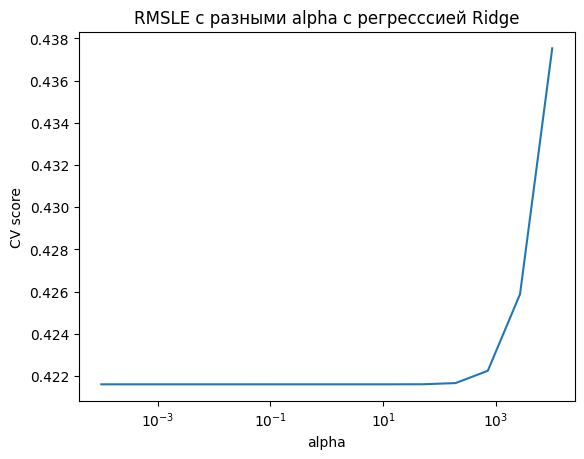

RMSLE: 0.42152818690322325


In [127]:
## На втором семе делали такое
from sklearn.model_selection import GridSearchCV
column_transformer_ridge = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features_5),
    ('scaling', StandardScaler(), numerical_features_5)
])

ridge_model = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_ridge),
    ('regression', Ridge())
])

searcher_ridge = GridSearchCV(ridge_model, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher_ridge.fit(X_test6, y_test6)

best_alpha = searcher_ridge.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher_ridge.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.title("RMSLE с разными alpha с регресссией Ridge")
plt.show()


model_ridge_for_rmsle = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_ridge),
    ('regression', Ridge(alpha=best_alpha))
])
model_ridge_for_rmsle.fit(X_train6, y_train6)
rmsle_ridge = np.sqrt(np.mean((model_ridge_for_rmsle.predict(X_test6) - y_test6) ** 2))
print(f'RMSLE: {rmsle_ridge}')

In [128]:
alpha_ridge = best_alpha
alpha_ridge

0.2682695795279725

# Оптимальный alpha и RMLSE для lasso

Best alpha = 0.0001


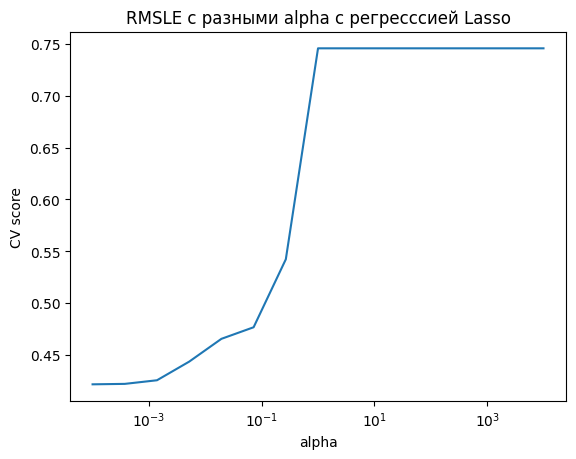

RMSLE: 0.42158529424240276


In [129]:
## На втором семе делали такое
column_transformer_lasso = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features_5),
    ('scaling', StandardScaler(), numerical_features_5)
])

lasso_model = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_lasso),
    ('regression', Lasso())
])

searcher_lasso = GridSearchCV(lasso_model, [{"regression__alpha": alphas}],
                              scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher_lasso.fit(X_test6, y_test6)

best_alpha = searcher_lasso.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher_lasso.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.title("RMSLE с разными alpha с регресссией Lasso")
plt.show()


model_lasso_for_rmsle = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_lasso),
    ('regression', Lasso(alpha=best_alpha))
])
model_lasso_for_rmsle.fit(X_train6, y_train6)
rmsle_lasso = np.sqrt(np.mean((model_lasso_for_rmsle.predict(X_test6) - y_test6) ** 2))
print(f'RMSLE: {rmsle_lasso}')

In [130]:
alpha_lasso = best_alpha
alpha_lasso

0.0001

Сохраните наилучшее значение, как бенчмарк на будущее

In [131]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = min(rmsle_lasso, rmsle_ridge)
best_rmsle

0.42152818690322325

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

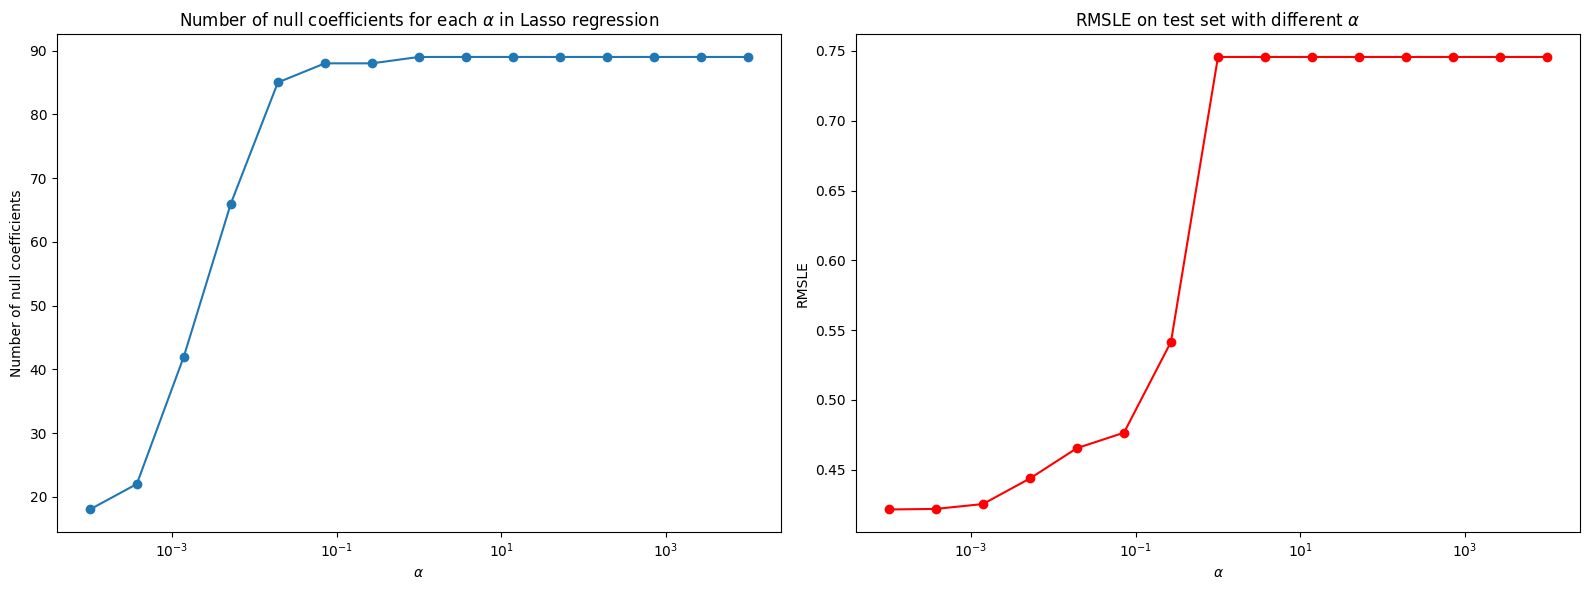

In [132]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
null_coeffs_history = [] ## тУТ буду хранить нулевые коэфы
rmsle_values = []

for alpha in alphas:
    lasso = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer_lasso),
        ('regression', Lasso(alpha=alpha, max_iter=10000))
    ])
    lasso.fit(X_train6, y_train6)

    n_zero_weights = np.sum(lasso.named_steps["regression"].coef_ == 0) # СЧИтаю кол-во нулевых векторов
    null_coeffs_history.append(n_zero_weights)

    # RMSLE на тестовой выборке
    y_pred = lasso.predict(X_test6)
    rmsle = np.sqrt(np.mean(((y_pred) - (y_test6)) ** 2))
    rmsle_values.append(rmsle)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(alphas, null_coeffs_history, marker='o')
ax[0].set_xscale("log")
ax[0].set_xlabel("$\\alpha$")
ax[0].set_ylabel("Number of null coefficients")
ax[0].set_title("Number of null coefficients for each $\\alpha$ in Lasso regression")

ax[1].plot(alphas, rmsle_values, marker='o', color='red')
ax[1].set_xscale("log")
ax[1].set_xlabel("$\\alpha$")
ax[1].set_ylabel("RMSLE")
ax[1].set_title("RMSLE on test set with different $\\alpha$")

plt.tight_layout()
plt.show()


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: Наверное можно прикрутить, что мы будем знать самые популярные маршруты, чтобы понимать, например, что щас час пик значит спрос на самый популярный маршрут будет высокий (ну как пример). По поводу линейной модели - она обучается независимо от каждого параметра и тупо не выкупит по отдельности данные, поэтому их надо объединить если нам надо учитывать этот момент.

In [133]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pair_counts = df.groupby(['ride_pos_start', 'ride_pos_end']).size().reset_index(name='count') # считаем такие пары
top_100_pairs = pair_counts.nlargest(100, 'count')[['ride_pos_start', 'ride_pos_end']]
pair_to_id = {tuple(row): idx for idx, row in enumerate(top_100_pairs.values)} # словарь чтобы сторить самые частые пары

In [134]:
def encode_pair(row): # если пары нет в списке, то -1, если есть то чем меньше индекс, тем более популярный маршрут
    return pair_to_id.get((row['ride_pos_start'], row['ride_pos_end']), -1)

In [135]:
df['route_code'] = df.apply(encode_pair, axis=1)
df[['ride_pos_start', 'ride_pos_end', 'route_code']].head()

,ride_pos_start,ride_pos_end,route_code
0,7,7,3
1,4,3,4
2,7,0,40
3,-1,-1,6
4,10,7,35


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [136]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features_7= [
    'day_of_week', 'hour', 'month',
    'anomalous_period_1', 'anomalous_period_2',
    'rush_hour', 'free_flow',
    'pickup_manhattan' ,	'dropoff_manhattan','pickup_laguardia',
    'dropoff_laguardia' ,	'pickup_jfk' 	,'dropoff_jfk',
    'vendor_id', 'store_and_fwd_flag',
        'ride_pos_start', 'ride_pos_end',
    'route_code'

]
numerical_features_7 = ['log_haversine', 'day_of_year']

X7 = df[categorical_features_7 + numerical_features_7]
y7 = df['log_trip_duration']

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.3, random_state=42)

preprocessor7 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_7),
        ('num', StandardScaler(), numerical_features_7)
    ])

model7 = Pipeline(steps=[
    ('preprocessor', preprocessor7),
    ('regressor', Ridge())
])
model7.fit(X_train7, y_train7)
test_score7 = model7.score(X_test7, y_test7)
rmsle7 = np.sqrt(np.mean((model7.predict(X_test7) - y_test7) ** 2))
print(f'R^2 на тестовой выборке: {test_score7}') # Его тут не просят я прост вывожу
print(f'RMSLE: {rmsle7}')

R^2 на тестовой выборке: 0.700159603398702
RMSLE: 0.4082185733700457


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?
**Ответ**: Это L1 норма, которую называют манхэтенской потому что планировку манхэттена реализовывал итаким образом что расстояние кварталов можно найти с помощью этой нормы. Нам оно очевидно может помочь если нам нужно понять расстояние, которое проезжает такси.

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [137]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['manhattan_distance'] = abs(df['pickup_latitude'] - df['dropoff_latitude']) + abs(df['pickup_longitude'] - df['dropoff_longitude'])
df['log_manhattan_distance'] = np.log1p(df['manhattan_distance'])
df[['manhattan_distance', 'log_manhattan_distance']].head()

,manhattan_distance,log_manhattan_distance
0,0.019859,0.019665
1,0.026478,0.026133
2,0.080158,0.077108
3,0.015480,0.015361
4,0.010818,0.010760


In [138]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
correlation_log_manhattan = df['log_manhattan_distance'].corr(df['log_trip_duration'])
correlation_log_haversine = df['log_haversine'].corr(df['log_trip_duration'])

print(f"Correlation between log_manhattan_distance and target: {correlation_log_manhattan}")
print(f"Correlation between log_haversine and target: {correlation_log_haversine}")

if correlation_log_manhattan > correlation_log_haversine:
  print("Корреляция больше c манхэт. расстоянием.")
else:
  print("Корреляция больше c хаверсин. расстоянием.")


Correlation between log_manhattan_distance and target: 0.6496349166213625
Correlation between log_haversine and target: 0.7771156206406278
Корреляция больше c хаверсин. расстоянием.


Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [139]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

numerical_features_8 = ['log_haversine', 'day_of_year', 'log_manhattan_distance']

X8 = df[categorical_features_7 + numerical_features_8]
y8 = df['log_trip_duration']

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.3, random_state=42)

preprocessor8 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_7),
        ('num', StandardScaler(), numerical_features_8)
    ])

model8 = Pipeline(steps=[
    ('preprocessor', preprocessor8),
    ('regressor', Ridge())
])
model8.fit(X_train8, y_train8)
test_score8 = model8.score(X_test8, y_test8)
rmsle8 = np.sqrt(np.mean((model8.predict(X_test8) - y_test8) ** 2))
print(f'R^2 на тестовой выборке: {test_score8}') # Его тут не просят я прост вывожу
print(f'RMSLE: {rmsle8}')

R^2 на тестовой выборке: 0.7076694568806985
RMSLE: 0.40307400028908247


**Ответ:** стало чуть чуть лучше (ну прямо гига маленькое изменение). Думаю связано с тем, что чтобы использовать л1 норму для рассчета расстояния необходимы условия выполненая планировки местности как в манхеттоне (пример там где идеально л1 норма подходит под планировку и можно ей считать расстояние), а так как нью йорк состоит не только из манхеттена, то на каких то данных он пользы не дал, зато подозреваю что в поездки в манхеттене и наш новый признак хорошо друг другу подходят и поэтому мини улучшение есть.

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

*Добавлю признак была ли поездка на выхах(на них обычно поездок больше, а цены в среднем меньше, зато вечером в выхи часто спрос ОЧЕНЬ высокий)*

In [140]:
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [141]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical_features_9= [
    'day_of_week', 'hour', 'month',
    'anomalous_period_1', 'anomalous_period_2',
    'rush_hour', 'free_flow',
    'pickup_manhattan' ,	'dropoff_manhattan','pickup_laguardia',
    'dropoff_laguardia' ,	'pickup_jfk' 	,'dropoff_jfk',
    'vendor_id', 'store_and_fwd_flag',
        'ride_pos_start', 'ride_pos_end',
    'route_code', 'is_weekend'

]
numerical_features_9 = ['log_haversine', 'day_of_year', 'log_manhattan_distance']

X9 = df[categorical_features_9 + numerical_features_9]
y9 = df['log_trip_duration']

X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.3, random_state=42)

preprocessor9 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_9),
        ('num', StandardScaler(), numerical_features_9)
    ])

model9 = Pipeline(steps=[
    ('preprocessor', preprocessor9),
    ('regressor', Ridge())
])
model9.fit(X_train9, y_train9)
rmsle9 = np.sqrt(np.mean((model9.predict(X_test9) - y_test9) ** 2))
print(f'RMSLE с новым признаком: {rmsle9} и лучший RMSLE: {best_rmsle}')

RMSLE с новым признаком: 0.4030739124102199 и лучший RMSLE: 0.42152818690322325


*Как видим такой простой признак смог улучшить, теперь добавлю сезон (у нас всего зима и весна)*

In [142]:
season_mapping = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer'
}
df['season'] = df['month'].map(season_mapping)

categorical_features_10= [
    'day_of_week', 'hour', 'month',
    'anomalous_period_1', 'anomalous_period_2',
    'rush_hour', 'free_flow',
    'pickup_manhattan' ,	'dropoff_manhattan','pickup_laguardia',
    'dropoff_laguardia' ,	'pickup_jfk' 	,'dropoff_jfk',
    'vendor_id', 'store_and_fwd_flag',
        'ride_pos_start', 'ride_pos_end',
    'route_code', 'is_weekend', 'season'

]
numerical_features_10= ['log_haversine', 'day_of_year', 'log_manhattan_distance']

X10= df[categorical_features_10+ numerical_features_10]
y10= df['log_trip_duration']

X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.3, random_state=42)

preprocessor10 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_10),
        ('num', StandardScaler(), numerical_features_10)
    ])

model10 = Pipeline(steps=[
    ('preprocessor', preprocessor10),
    ('regressor', Ridge())
])
model10.fit(X_train10, y_train10)
rmsle10 = np.sqrt(np.mean((model10.predict(X_test10) - y_test10) ** 2))
print(f'RMSLE с новым признаком: {rmsle10} и лучший RMSLE: {best_rmsle}')

RMSLE с новым признаком: 0.40307378339519234 и лучший RMSLE: 0.42152818690322325


*Лан, ниче не могу больше думать и делать, оставлю как есть все. Думал еще додавить разбиние на время, но как то хз, сил нет. Честно думал, что нуднее первой домашки по МО на курсе ниче не будет, но тут оказалось что есть вот эта домашка... минус мораль и силы*

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

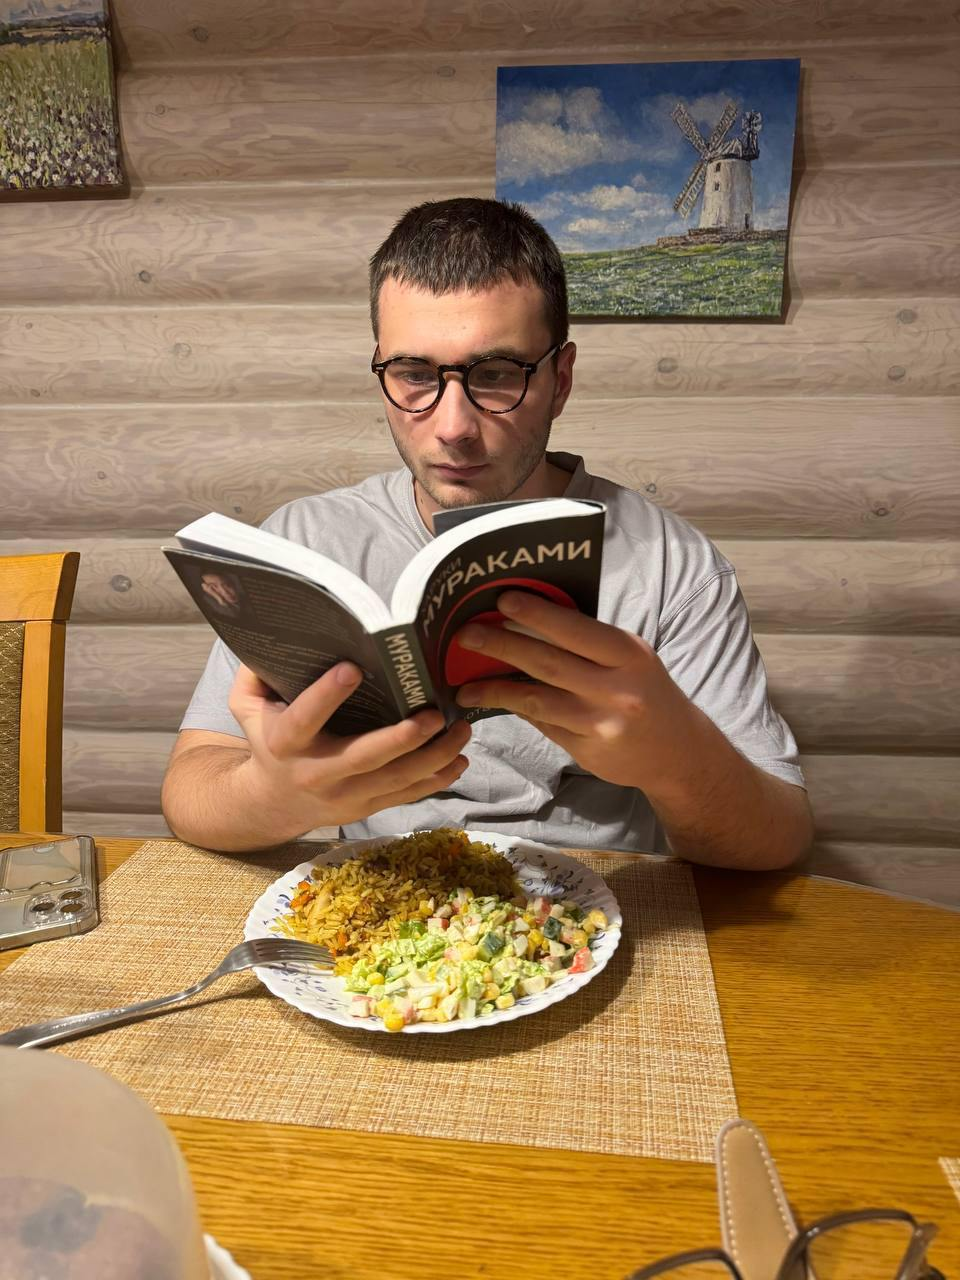